In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

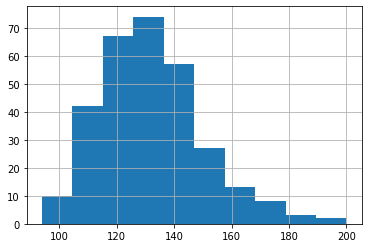

In [5]:
data.trestbps.hist()

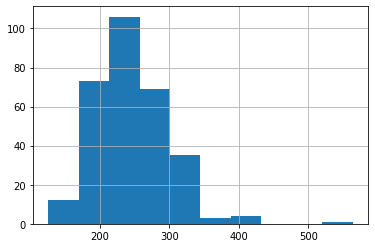

In [6]:
data.chol.hist()

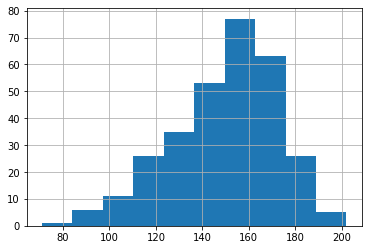

In [7]:
data.thalach.hist()

In [8]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

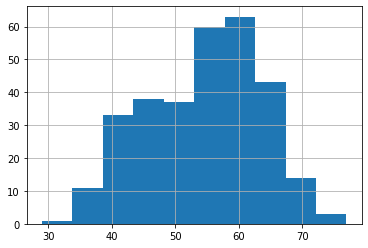

In [9]:
data.age.hist()

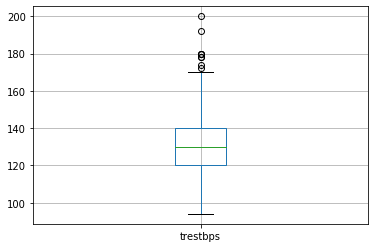

In [10]:
data.boxplot(column = 'trestbps')

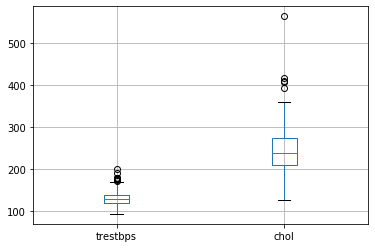

In [11]:
data.boxplot(column = ['trestbps','chol'])

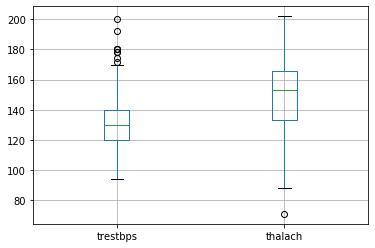

In [12]:
data.boxplot(column = ['trestbps','thalach'])

In [13]:
data[['age','cp','trestbps','chol','thalach','fbs']].corr()

,age,cp,trestbps,chol,thalach,fbs
age,1.000000,-0.068653,0.279351,0.213678,-0.398522,0.121308
cp,-0.068653,1.000000,0.047608,-0.076904,0.295762,0.094444
trestbps,0.279351,0.047608,1.000000,0.123174,-0.046698,0.177531
chol,0.213678,-0.076904,0.123174,1.000000,-0.009940,0.013294
thalach,-0.398522,0.295762,-0.046698,-0.009940,1.000000,-0.008567
fbs,0.121308,0.094444,0.177531,0.013294,-0.008567,1.000000


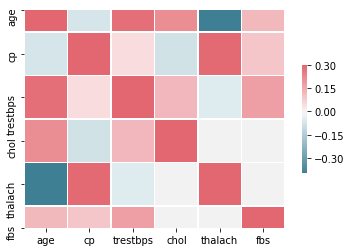

In [14]:
correlation = data[['age','cp','trestbps','chol','thalach','fbs']].corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(correlation,vmax=0.3,center=0,cmap = cmap,square=True,linewidths=.5,
            cbar_kws={"shrink":.5})

In [15]:
# correlation variables age&trestbs age&chol cp&thalach trestbps&fbs chol&trestbps



In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
haveDis = len(data[data.target == 1])
haveNoDis = len(data[data.target == 0])
patients = len(data.target)
print("Pourcentage of People with heart disease : %.2f %%"%((haveDis/patients)*100))
print("Pourcentage of People without heart disease : %.2f %%"%((haveNoDis/patients)*100))

Pourcentage of People with heart disease : 54.46 %
Pourcentage of People without heart disease : 45.54 %


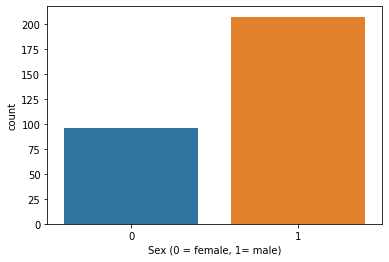

In [18]:
sns.countplot(x='sex', data=data, palette=None)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

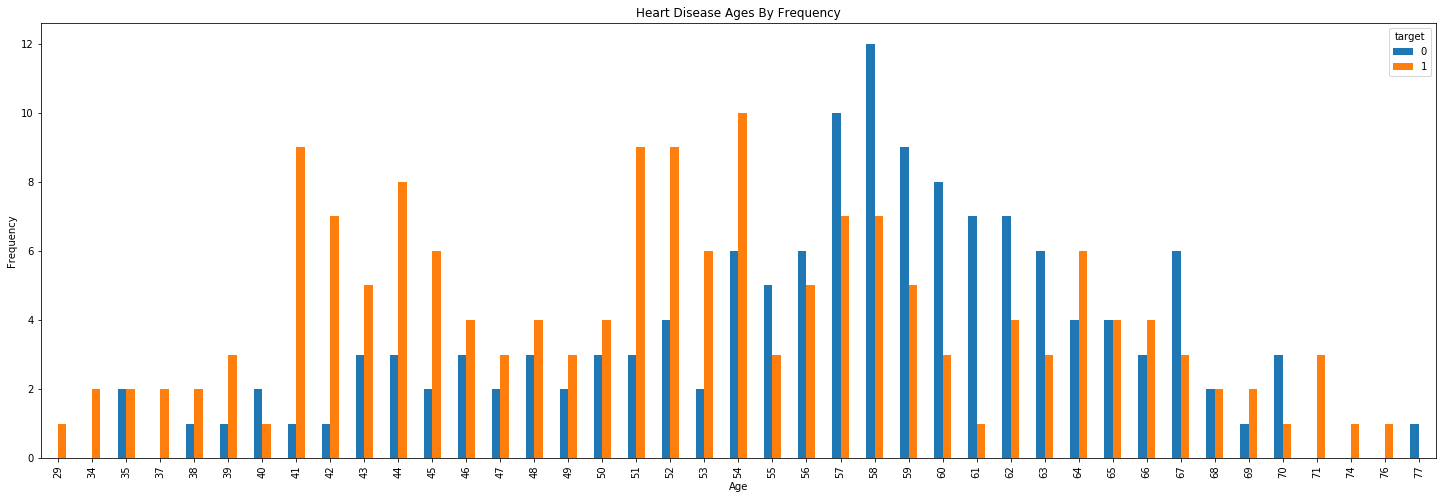

In [19]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8))
plt.title('Heart Disease Ages By Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [20]:
pd.pivot_table(data,index='cp',values='age')

,age
cp,
0,55.692308
1,51.360000
2,53.517241
3,55.869565


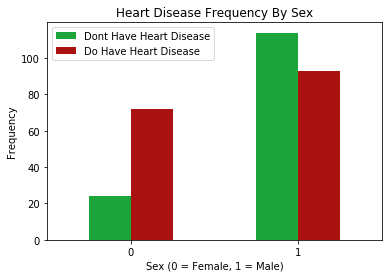

In [21]:
pd.crosstab(data.sex,data.target).plot(kind="bar",color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency By Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Dont Have Heart Disease", "Do Have Heart Disease"])
plt.ylabel('Frequency')
plt.show()

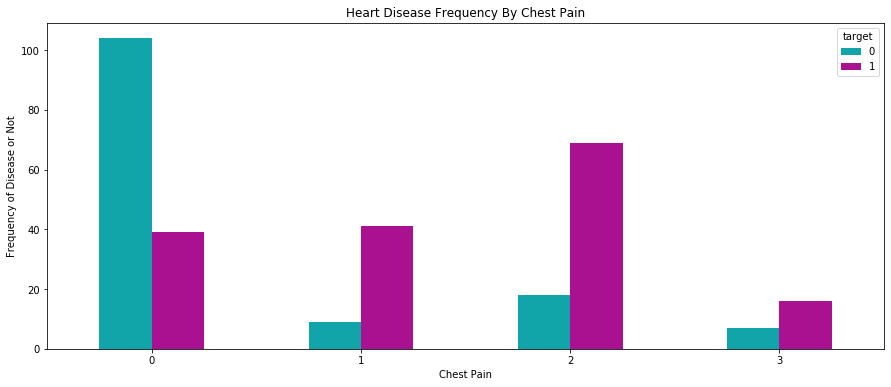

In [22]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency By Chest Pain')
plt.xlabel('Chest Pain')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()